In [1]:
#Step 1: IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
#Step 2a: IMPORTING & ANALYSING DATA
customers = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 6\customers.csv")
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [4]:
customers.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_8274,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [5]:
#Format birth to datetime
customers['birth'] = pd.to_datetime(customers['birth'], format= '%Y')

In [6]:
customers.dtypes

client_id            object
sex                  object
birth        datetime64[ns]
dtype: object

In [7]:
customers.isna().values.any()

False

In [8]:
#Step 2b: IMPORTING & ANALYSING DATA
products = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 6\products.csv")
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [10]:
products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,1_206,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [11]:
products.isna().values.any()

False

In [12]:
#Step 2c: IMPORTING & ANALYSING DATA
transactions = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 6\transactions.csv")
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [13]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [14]:
transactions.loc[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [15]:
#drop test data
transactions.drop(transactions.loc[transactions['id_prod'] == 'T_0'].index, inplace=True)

In [16]:
#format date
transactions['date'] = pd.to_datetime(transactions['date'], format= '%Y-%m-%d %H:%M:%S')

In [17]:
transactions.shape

(679332, 4)

In [18]:
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [19]:
transactions.isna().values.any()

False

In [20]:
#Antoine
#Question 1: Evolution CA

In [21]:
#step 1: merging the required dataframes
trans_prod = transactions.merge(products, on='id_prod', how='left')
trans_prod

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0
...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0


In [22]:
#Correcting product 0_2245:
trans_prod.loc[trans_prod.id_prod == "0_2245", "categ"] = 0
trans_prod['price'] = trans_prod['price'].fillna(trans_prod.groupby('categ')['price'].transform('mean'))
trans_prod.loc[trans_prod["id_prod"] == "0_2245"]

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,10.638188,0.0
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,10.638188,0.0
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,10.638188,0.0
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,10.638188,0.0
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,10.638188,0.0
...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,10.638188,0.0
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,10.638188,0.0
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,10.638188,0.0
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,10.638188,0.0


In [23]:
#Unsold products:
trans_prod_nan = transactions.merge(products, on='id_prod', how='outer',indicator=True)
trans_prod_nan = trans_prod_nan[trans_prod_nan._merge == "right_only"]
trans_prod_nan

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaT,NaN,NaN,1.67,0.0,right_only
679334,T_0,NaT,NaN,NaN,-1.00,0.0,right_only
679335,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
679336,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
679337,0_1014,NaT,NaN,NaN,1.15,0.0,right_only
679338,1_0,NaT,NaN,NaN,31.82,1.0,right_only
679339,0_1318,NaT,NaN,NaN,20.92,0.0,right_only
679340,0_1800,NaT,NaN,NaN,22.05,0.0,right_only
679341,0_1645,NaT,NaN,NaN,2.99,0.0,right_only


Text(0, 0.5, 'amount')

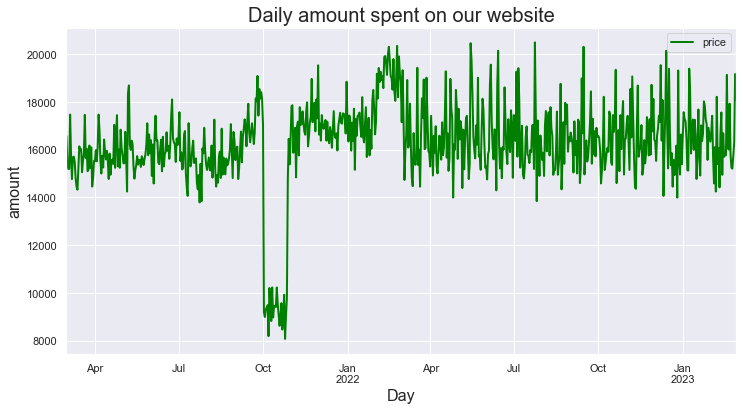

In [24]:
#Evolution CA par jour
trans_prod_day = trans_prod.groupby(pd.Grouper(key='date',freq='D')).agg({'price':'sum'})
trans_prod_day.plot(color='green', linewidth=2, figsize=(12,6))
plt.title('Daily amount spent on our website', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('amount', fontsize=16)

Text(0, 0.5, 'amount')

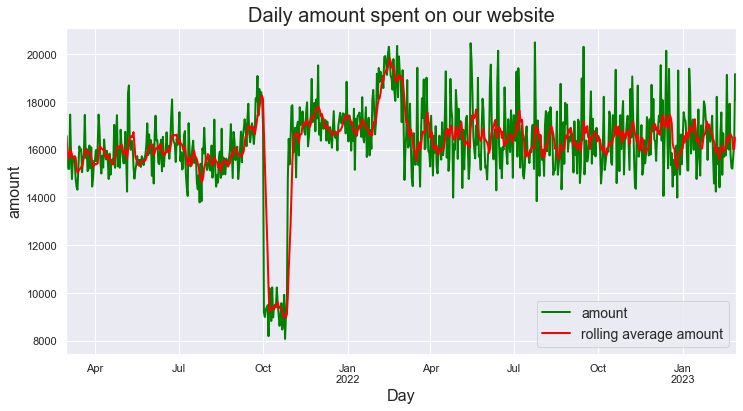

In [25]:
#Evolution CA par jour avec moyenne mobile de 7 jours
trans_prod_day['RollAvg'] = trans_prod_day.rolling(7, min_periods=1).mean()
colors = ['green', 'red']
trans_prod_day.plot(color=colors, linewidth=2, figsize=(12,6))
plt.legend(labels =['amount', 'rolling average amount'], fontsize=14)
plt.title('Daily amount spent on our website', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('amount', fontsize=16)

In [26]:
#Evolution CA par mois
trans_prod_month = trans_prod.groupby(pd.Grouper(key='date',freq='M')).agg({'price':'sum'})
trans_prod_month.index = trans_prod_month.index.strftime('%B, %Y')
trans_prod_month

,price
"March, 2021",482536.353692
"April, 2021",476258.234633
"May, 2021",493028.575504
"June, 2021",484163.027316
"July, 2021",482877.952752
"August, 2021",482380.533692
"September, 2021",507368.338257
"October, 2021",320873.207316
"November, 2021",516274.111880
"December, 2021",525991.747316


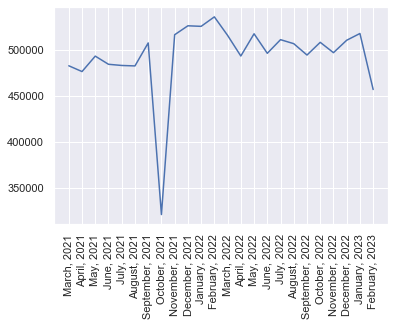

In [27]:
plt.plot(trans_prod_month['price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [28]:
#why the dip in October?
trans_oct = trans_prod[(trans_prod['date'] > "2021-10-01") & (trans_prod['date'] < "2021-11-01")]
trans_oct

,id_prod,date,session_id,client_id,price,categ
68,0_1409,2021-10-02 17:39:26.919537,s_99013,c_5725,4.99,0.0
71,0_1247,2021-10-03 16:05:12.544172,s_99443,c_3394,15.99,0.0
80,0_1272,2021-10-13 14:35:01.163737,s_104207,c_8534,17.01,0.0
86,0_1102,2021-10-24 13:25:39.888945,s_109442,c_1609,4.63,0.0
93,0_1079,2021-10-05 21:57:27.673800,s_100557,c_7918,5.99,0.0
...,...,...,...,...,...,...
679222,0_1418,2021-10-22 01:12:51.848429,s_108264,c_7213,8.57,0.0
679240,0_1391,2021-10-26 04:40:29.252116,s_110243,c_7878,7.99,0.0
679290,0_1609,2021-10-15 16:58:58.818380,s_105230,c_6714,18.99,0.0
679315,0_1635,2021-10-01 23:19:52.888190,s_98649,c_1061,16.99,0.0


In [29]:
#checking categories in October
trans_oct_cat = trans_oct.set_index('date').groupby([pd.Grouper(freq='D'), 'categ'] ).count()
trans_oct_cat.reset_index(inplace=True)
trans_oct_cat.index = pd.DatetimeIndex(trans_oct_cat.date)
trans_oct_cat.drop(columns=['session_id','client_id','price','date'], inplace=True)
trans_oct_cat

,categ,id_prod
date,,
2021-10-01,0.0,663
2021-10-01,1.0,344
2021-10-01,2.0,38
2021-10-02,0.0,661
2021-10-02,2.0,28
...,...,...
2021-10-30,1.0,338
2021-10-30,2.0,40
2021-10-31,0.0,555


Text(0.5, 1.0, 'category distribution throughout October')

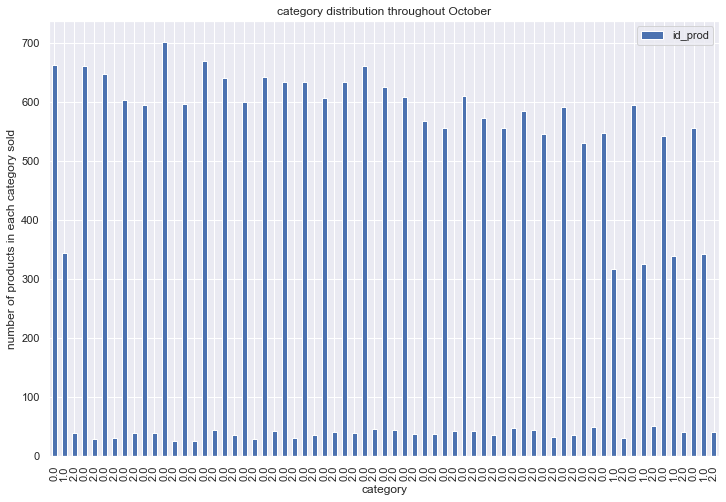

In [30]:
trans_oct_cat.plot(x='categ', y=['id_prod'], kind="bar",figsize=(12,8))
plt.xlabel('category')
plt.ylabel('number of products in each category sold')
plt.title('category distribution throughout October')

In [31]:
#Antoine
#Question 2a: CA par catégorie

In [32]:
ca_cat = trans_prod.groupby(['categ'])[['price']].sum()
ca_cat.style.format("{:.1f}")

,price
categ,
0.0,4422082.0
1.0,4653722.7
2.0,2780275.0


In [33]:
#Antoine
#Question 2b: CA par sexe

In [34]:
#Step 1: Merge DFs
full_data = trans_prod.merge(customers, on='client_id', how='left')
full_data

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986-01-01
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988-01-01
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968-01-01
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980-01-01
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951-01-01
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977-01-01
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988-01-01
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986-01-01


In [35]:
full_data.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth         datetime64[ns]
dtype: object

In [36]:
#step 2: calculate CA par sexe
ca_sexe = full_data.groupby(['sex'])[['price']].sum()
ca_sexe.style.format("{:.1f}")

,price
sex,
f,5860927.8
m,5995151.9


In [37]:
#Antoine
#Question 2c: CA par age

In [38]:
#step 1: convert birth year into age
full_data['age'] = 2023 - pd.DatetimeIndex(full_data['birth']).year
full_data.drop(['birth'], axis=1, inplace=True)
full_data

,id_prod,date,session_id,client_id,price,categ,sex,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,35
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,55
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,43
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,72
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,46
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,35
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,37


In [39]:
#calculate CA par age
ca_age = full_data.groupby(['age'])[['price']].sum().reset_index()
ca_age.style.format("{:.1f}")

,age,price
0,19.0,609013.7
1,20.0,178195.8
2,21.0,184209.3
3,22.0,178497.7
4,23.0,165029.3
5,24.0,489497.5
6,25.0,203545.8
7,26.0,182916.8
8,27.0,259425.1
9,28.0,227322.9


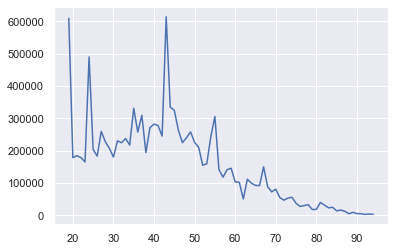

In [40]:
plt.plot(ca_age['age'], ca_age['price'])
plt.show()

In [41]:
#Average CA par session

In [42]:
session_mean = full_data.groupby(['session_id'])[['price']].sum().mean()
session_mean

price    34.634999
dtype: float64

In [43]:
#Antoine
#Question 3a: Book sales tops & flops (by product)

In [44]:
#Top earners
full_data_prodprice = full_data.groupby('id_prod')['price'].sum().reset_index()
full_data_prodprice.sort_values('price', ascending=False).head(20)

,id_prod,price
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78
3153,2_209,56971.86
2620,1_395,54356.25
2592,1_369,54025.48
3044,2_110,53846.25
3202,2_39,53060.85
3105,2_166,52449.12


In [45]:
#lowest earners
full_data_prodprice.sort_values('price').head(20)

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1785,0_541,1.99
2080,0_807,1.99
665,0_1601,1.99
802,0_1728,2.27
549,0_1498,2.48
2180,0_898,2.54
925,0_1840,2.56


In [46]:
#Antoine
#Question 3b: Book sales tops & flops (by category)

In [47]:
ca_cat_sorted = ca_cat.sort_values('price', ascending=False)
ca_cat_sorted.style.format("{:.1f}")

,price
categ,
1.0,4653722.7
0.0,4422082.0
2.0,2780275.0


In [48]:
#Antoine
#Question 4a: Client profile (age)

In [49]:
cp_age = full_data.groupby('age')['client_id'].count().reset_index()
cp_age

,age,client_id
0,19,15149
1,20,4371
2,21,4587
3,22,4252
4,23,4415
...,...,...
71,90,327
72,91,311
73,92,170
74,93,226


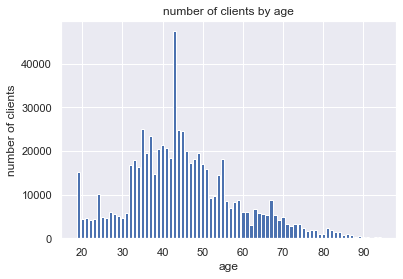

In [50]:
x = cp_age['age']
y = cp_age['client_id']
plt.xlabel('age')
plt.ylabel('number of clients')
plt.title('number of clients by age')

plt.bar(x, y)
plt.show()

In [51]:
#Antoine
#Question 4b: Client profile (sexe)

In [52]:
cp_sexe = full_data.groupby('sex')['client_id'].count()
cp_sexe

sex
f    338402
m    340930
Name: client_id, dtype: int64

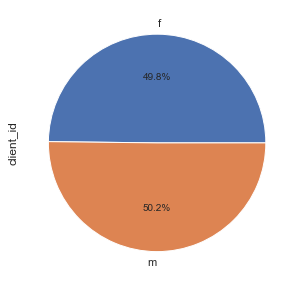

In [53]:
plot = cp_sexe.plot.pie(figsize=(5, 5), autopct='%1.1f%%')

In [54]:
#Antoine
#Question 5a: Lorenz Curve (per customer)

In [55]:
ca_customer = full_data.groupby('client_id')['price'].sum().reset_index()
ca_cust_sorted = ca_customer.sort_values('price')
ca_cust_sorted

,client_id,price
8151,c_8351,6.310000
7918,c_8140,8.300000
7889,c_8114,9.980000
1556,c_240,11.060000
4044,c_4648,11.200000
...,...,...
2513,c_3263,5276.870000
2724,c_3454,113669.844564
6337,c_6714,153662.749128
4388,c_4958,289760.340000


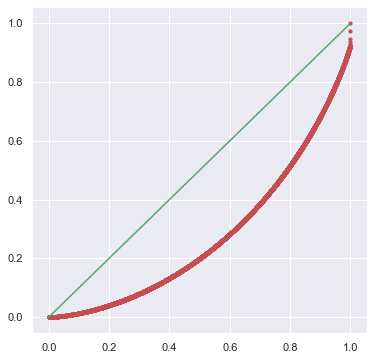

In [56]:
lorenz = ca_cust_sorted['price'].cumsum() / ca_cust_sorted['price'].sum()
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(lorenz.size)/(lorenz.size-1), lorenz, color='r', s=10)
## line plot of equality
ax.plot([0,1], [0,1], color='g')

In [57]:
array = ca_cust_sorted["price"].to_numpy()
def gini(array):
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))
print(gini(array))

0.4463955226980682


In [58]:
#Antoine
#Question 5b: Lorenz Curve (per session)

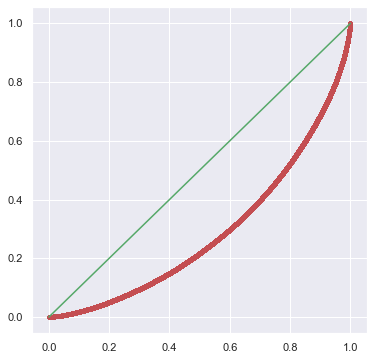

In [59]:
ca_session = full_data.groupby('session_id')['price'].sum().reset_index()
ca_sess_sorted = ca_session.sort_values('price')
lorenz_s = ca_sess_sorted['price'].cumsum() / ca_sess_sorted['price'].sum()

fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(lorenz_s.size)/(lorenz_s.size-1), lorenz_s, color='r', s=10)
## line plot of equality
ax.plot([0,1], [0,1], color='g')

In [60]:
array_s = ca_sess_sorted["price"].to_numpy()
def gini(array_s):
    index = np.arange(1,array_s.shape[0]+1)
    n = array_s.shape[0]
    return ((np.sum((2 * index - n  - 1) * array_s)) / (n * np.sum(array_s)))
print(gini(array_s))

0.4228030793185498


In [61]:
#Julie
#Question 1: Link between type of client and book categories bought

In [62]:
CrosstabResult=pd.crosstab(index=full_data['sex'],columns=full_data['categ'])
print(CrosstabResult)
ChiSqResult = stats.chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', (ChiSqResult[1]))

categ     0.0     1.0    2.0
sex                         
f      206220  114899  17283
m      209460  112270  19200
The P-Value of the ChiSq Test is: 1.1989607410166063e-32


In [63]:
#Julie
#Question 2a: Link between age of client and total amount spent

In [64]:
corr, p_value = stats.pearsonr(ca_age['age'],ca_age['price'])
print('Pearsons correlation: %.3f' % corr, 'P-value is: %.3f' % p_value)

Pearsons correlation: -0.779 P-value is: 0.000


In [65]:
#Julie
#Question 2b: Link between age of client and frequency

In [66]:
session_count = full_data.groupby('age')['session_id'].count().reset_index()
session_count

,age,session_id
0,19,15149
1,20,4371
2,21,4587
3,22,4252
4,23,4415
...,...,...
71,90,327
72,91,311
73,92,170
74,93,226


In [67]:
corr, p_value = stats.pearsonr(session_count['age'],session_count['session_id'])
print('Pearsons correlation: %.3f' % corr, 'P-value is: %.3f' % p_value)

Pearsons correlation: -0.534 P-value is: 0.000


In [68]:
#Julie
#Question 2c: Link between age of client and average of shopping basket

In [69]:
age_count = full_data.groupby(['age'])['client_id'].count().reset_index()
age_count_price = age_count.merge(ca_age, how = 'left')
age_count_price['avg basket'] = age_count_price['price']/age_count_price['client_id']
age_count_price

,age,client_id,price,avg basket
0,19,15149,609013.690000,40.201577
1,20,4371,178195.780000,40.767737
2,21,4587,184209.264564,40.158985
3,22,4252,178497.700000,41.979704
4,23,4415,165029.256376,37.379220
...,...,...,...,...
71,90,327,5264.988188,16.100881
72,91,311,5043.190000,16.216045
73,92,170,2815.450000,16.561471
74,93,226,4013.870000,17.760487


In [70]:
corr, p_value = stats.pearsonr(age_count_price['age'],age_count_price['avg basket'])
print('Pearsons correlation: %.3f' % corr, 'P-value is: %.3f' % p_value)

Pearsons correlation: -0.548 P-value is: 0.000


In [71]:
#Julie
#Question 2d: Link between age of client and book categories

In [72]:
stats.f_oneway(full_data['age'][full_data['categ'] == 0],
               full_data['age'][full_data['categ'] == 1],
               full_data['age'][full_data['categ'] == 2])

F_onewayResult(statistic=45883.780588713154, pvalue=0.0)

In [73]:
#Julie
#Question 3: Probability of a client buying 0_525 if they've bought 2_159

In [74]:
#find clients who've bought 2_159
client_2159 = trans_prod.loc[trans_prod.id_prod == "2_159"]
client_2159.drop(columns=['date', 'session_id','price', 'categ'], inplace=True)
clients_2159 = client_2159.groupby(by=["client_id"]).count().reset_index()

#find clients who've bought 0_525
client_0525 = trans_prod.loc[trans_prod.id_prod == "0_525"]
client_0525.drop(columns=['date', 'session_id','price', 'categ'], inplace=True)
clients_0525 = client_0525.groupby(by=["client_id"]).count().reset_index()

#find clients who've bought both
clients_both = clients_2159.merge(clients_0525, on='client_id', how='inner')

#calculate probability percentage
(len(clients_both)/len(clients_2159))*100

C:\Users\caspe\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


86.60377358490567

In [75]:
#Julie
#Unasked Question: Difference between Women and Men

In [76]:
stat, p = stats.ttest_ind((customers['sex'] == 'f'), (customers['sex'] == 'm'))
print('t=%.3f, p=%.3f' % (stat, p))

t=5.472, p=0.000


In [77]:
# degrees of freedom
n1, n2 = len((customers['sex'] == 'f')), len((customers['sex'] == 'm'))
df = n1 + n2 - 2
# calculate the critical value
alpha = 0.05
cv = stats.t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1 - stats.t.cdf(abs(stat), df)) * 2
print(df, cv, p)
# interpret via critical value
if abs(stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

17244 1.6449419969068266 4.516445883950837e-08
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
